In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import os 
import pandas as pd

font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 15}

plt.rc('font', **font) 

In [2]:
cwd = os.chdir('/Users/jackcarter/Blind_Mixture_Data')
df1 = pd.read_csv("jc_unmix_1_data_del_y.csv")
df2 = pd.read_csv('jc_unmix_2_data_yz.csv')
df3 = pd.read_csv('jc_unmix_4_data_yz.csv')
df4 = pd.read_csv('jc_unmix_5_data_y.csv')
df5 = pd.read_csv('jc_unmix6_data_y.csv')

In [3]:
df5.head()

,Age,Age_Er,Ar40_,Ar40_Er,Ar39_,Ar39_Er,Pwr_Achieved,Dur_Heating_At_Req_Pwr,Da2,Da2_err
0,1124.72200,18.108780,0.389818,0.00100,0.004077,0.000022,359.908300,2996.490,1.990000e-10,1.160000e-12
1,209.80370,40.490970,0.023350,0.00021,0.002068,0.000026,379.915000,2996.492,2.530000e-10,5.620000e-11
2,78.84478,32.842170,0.025993,0.00022,0.003250,0.000033,400.028000,2996.533,6.040000e-10,7.140000e-11
3,121.00250,10.949560,0.071136,0.00036,0.009361,0.000048,439.849000,1796.681,5.250000e-09,1.160000e-10
4,137.92860,4.355122,0.165648,0.00055,0.023440,0.000092,479.777591,1797.741,2.850000e-08,3.250000e-10


In [4]:
temp1 = df1['temp'].values
da21 = df1['Da2'].values

temp2 = df2['temp'].values
da22 = df2['Da2'].values

temp3 = df3['temp'].values
da23 = df3['Da2'].values

temp4 = df4['temp'].values
da24 = df4['Da2'].values

temp5 = df5['Pwr_Achieved'].values
da25 = df5['Da2'].values

In [5]:
# Part 1 ThermoCouple T Calibration 
## Step 1: Pyrometer Calibration
import os 
cwd = os.getcwd()
os.chdir("/Users/jackcarter/Desktop/Downloads")
df1 = pd.read_csv("PyroApril2018.csv")
x2  = df1['Pyro'].values
x1 = df1['Thermo'].values
zpt = np.polyfit(x1,x2,3)

In [6]:
temp1 = np.polyval(zpt, temp1)
temp2 = np.polyval(zpt, temp2)
temp3 = np.polyval(zpt, temp3)
temp4 = np.polyval(zpt, temp4)
temp5 = np.polyval(zpt, temp5)

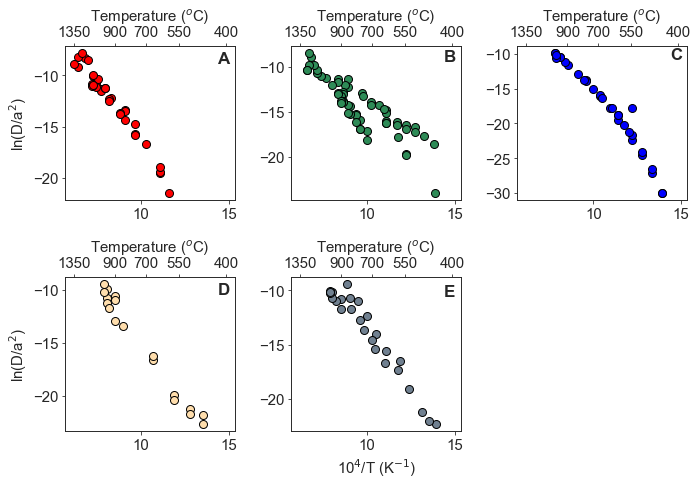

In [7]:
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 15}

plt.rc('font', **font) 
sns.set_style('ticks')

fig, ax = plt.subplots(2, 3, figsize= (10, 7))

ax[0,0].plot(10000/(temp1+ 273.15), np.log(da21), 
             'o', 
             markersize = 8, 
             markerfacecolor = 'r', 
             markeredgecolor = 'k')


ax2 = ax[0,0].twiny()

Tdc = np.array([400, 550, 700, 900,  1350])
Tp = 10e3/(Tdc + 273.15)
labels = list(['400', '550','700', '900',   
              '1350'])
ax2.plot(10000/(temp1+ 273.15), np.log(da21), alpha = 0)
ax2.set_xlabel('Temperature ($^{o}$C)')
ax[0,0].set_xlim(Tp.min() - 0.5, Tp.max()+ 0.5)
ax2.set_xlim(Tp.min() - 0.5, Tp.max()+ 0.5)

ax2.set_xlabel('Temperature ($^{o}$C)')
ax2.set_xticks(Tp)
ax2.set_xticklabels(labels)


ax[0,1].plot(10000/(temp2+ 273.15), np.log(da22), 
             'o', 
             markersize = 8, 
             markerfacecolor = 'seagreen', 
             markeredgecolor = 'k')


ax2 = ax[0,1].twiny()


ax2.plot(10000/(temp2+ 273.15), np.log(da22), alpha = 0)
ax2.set_xlabel('Temperature ($^{o}$C)')
ax[0,1].set_xlim(Tp.min() - 0.5, Tp.max()+ 0.5)
ax2.set_xlim(Tp.min() - 0.5, Tp.max()+ 0.5)

ax2.set_xlabel('Temperature ($^{o}$C)')
ax2.set_xticks(Tp)
ax2.set_xticklabels(labels)



ax[0,2].plot(10000/(temp3+ 273.15), np.log(da23), 
             'o', 
             markersize = 8, 
             markerfacecolor = 'b', 
             markeredgecolor = 'k')


ax2 = ax[0,2].twiny()


ax2.plot(10000/(temp3+ 273.15), np.log(da23), alpha = 0)
ax2.set_xlabel('Temperature ($^{o}$C)')
ax[0,2].set_xlim(Tp.min() - 0.5, Tp.max()+ 0.5)
ax2.set_xlim(Tp.min() - 0.5, Tp.max()+ 0.5)

ax2.set_xlabel('Temperature ($^{o}$C)')
ax2.set_xticks(Tp)
ax2.set_xticklabels(labels)


ax[1,0].plot(10000/(temp4+ 273.15), np.log(da24), 
             'o', 
             markersize = 8, 
             markerfacecolor = 'navajowhite', 
             markeredgecolor = 'k')


ax2 = ax[1,0].twiny()


ax2.plot(10000/(temp4+ 273.15), np.log(da24),  alpha = 0)
ax2.set_xlabel('Temperature ($^{o}$C)')
ax[1,0].set_xlim(Tp.min() - 0.5, Tp.max()+ 0.5)
ax2.set_xlim(Tp.min() - 0.5, Tp.max()+ 0.5)

ax2.set_xlabel('Temperature ($^{o}$C)')
ax2.set_xticks(Tp)
ax2.set_xticklabels(labels)


ax[1,1].plot(10000/(temp5+ 273.15), np.log(da25), 
             'o', 
             markersize = 8, 
             markerfacecolor = 'slategrey', 
             markeredgecolor = 'k')


ax2 = ax[1,1].twiny()


ax2.plot(10000/(temp5+ 273.15), np.log(da25), alpha = 0)
ax2.set_xlabel('Temperature ($^{o}$C)')
ax[1,1].set_xlim(Tp.min() - 0.5, Tp.max()+ 0.5)
ax2.set_xlim(Tp.min() - 0.5, Tp.max()+ 0.5)

ax2.set_xlabel('Temperature ($^{o}$C)')
ax2.set_xticks(Tp)
ax2.set_xticklabels(labels)

fig.delaxes(ax[1,2])

plt.tight_layout()
ax[0,0].set_ylabel('ln(D/a$^{2}$)')
ax[1,0].set_ylabel('ln(D/a$^{2}$)')

ax[1,1].set_xlabel('10$^{4}$/T (K$^{-1}$)')

s1 = 'A'
s2= 'B'
s3 = 'C'
s4 = 'D'
s5 = 'E'

ax[0,0].text(14.4, -8.8, s1, fontweight = 'bold', 
            fontsize = 17)
ax[0,1].text(14.4, -9.3, s2, fontweight = 'bold', 
            fontsize = 17)
ax[0,2].text(14.4, -10.8, s3, fontweight = 'bold', 
            fontsize = 17)
ax[1,0].text(14.4, -10.4, s4, fontweight = 'bold', 
            fontsize = 17)
ax[1,1].text(14.4, -10.5, s5, fontweight = 'bold', 
            fontsize = 17)

plt.tight_layout()
plt.savefig('/Users/jackcarter/Desktop/chp3_figs/bm_arr_plot.pdf')